In [1]:
import pandas as pd
from pySankey.sankey import sankey
from protrend.report.general import entities

In [8]:
relationships = []

for node in entities.values():
    source = node.node_name()
    for relationship in node.node_relationships().values():
        if 'node_class' not in relationship.definition:
            # noinspection PyProtectedMember
            relationship._lookup_node_class()

        target = relationship.definition['node_class'].node_name()

        connection = (source, target)

        if 'promoterregion' in connection:
            continue

        if 'source' in connection:
            continue

        if 'pathway' in connection:
            continue

        if ('evidence', 'regulator') == connection or ('regulator', 'evidence') == connection:
            continue

        if ('evidence', 'gene') == connection or ('gene', 'evidence') == connection:
            continue

        if ('evidence', 'operon') == connection  or ('operon', 'evidence') == connection:
            continue

        if ('publication', 'operon') == connection  or ('operon', 'publication') == connection:
            continue

        if ('publication', 'gene') == connection  or ('gene', 'publication') == connection:
            continue

        if ('publication', 'tfbs') == connection  or ('tfbs', 'publication') == connection:
            continue

        if ('organism', 'operon') == connection  or ('operon', 'organism') == connection:
            continue

        if ('motif', 'organism') == connection  or ('organism', 'motif') == connection:
            continue

        if ('regulator', 'publication') == connection  or ('publication', 'regulator') == connection:
            continue

        if ('regulatoryfamily', 'publication') == connection  or ('publication', 'regulatoryfamily') == connection:
            continue

        relationships.append(connection)

relationships

[('effector', 'regulator'),
 ('effector', 'regulatoryinteraction'),
 ('evidence', 'tfbs'),
 ('evidence', 'regulatoryinteraction'),
 ('gene', 'operon'),
 ('gene', 'organism'),
 ('gene', 'regulator'),
 ('gene', 'tfbs'),
 ('gene', 'regulatoryinteraction'),
 ('motif', 'tfbs'),
 ('motif', 'regulator'),
 ('operon', 'gene'),
 ('organism', 'regulator'),
 ('organism', 'gene'),
 ('organism', 'tfbs'),
 ('organism', 'regulatoryinteraction'),
 ('publication', 'regulatoryinteraction'),
 ('regulator', 'effector'),
 ('regulator', 'regulatoryfamily'),
 ('regulator', 'organism'),
 ('regulator', 'gene'),
 ('regulator', 'tfbs'),
 ('regulator', 'regulatoryinteraction'),
 ('regulator', 'motif'),
 ('regulatoryfamily', 'regulator'),
 ('regulatoryinteraction', 'evidence'),
 ('regulatoryinteraction', 'publication'),
 ('regulatoryinteraction', 'effector'),
 ('regulatoryinteraction', 'organism'),
 ('regulatoryinteraction', 'regulator'),
 ('regulatoryinteraction', 'gene'),
 ('regulatoryinteraction', 'tfbs'),
 ('tf

In [9]:
df = pd.DataFrame(relationships, columns=['source', 'target'])
df

,source,target
0,effector,regulator
1,effector,regulatoryinteraction
2,evidence,tfbs
3,evidence,regulatoryinteraction
4,gene,operon
5,gene,organism
6,gene,regulator
7,gene,tfbs
8,gene,regulatoryinteraction
9,motif,tfbs


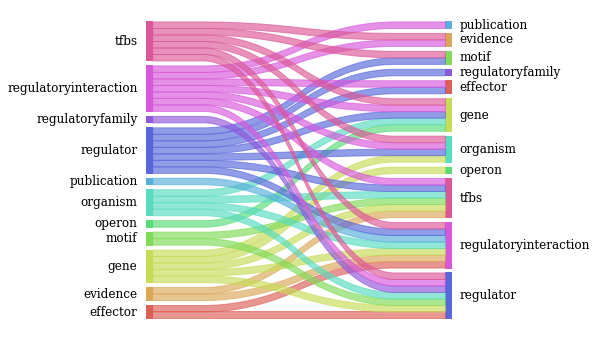

In [12]:
from matplotlib import pyplot as plt

sankey(df["source"], df["target"], fontsize=12)
fig = plt.gcf()
fig.savefig("cds.png", bbox_inches="tight", dpi=150)